In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255
)

train_dataset = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset/dataset_reducido',
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 102 images belonging to 4 classes.


In [ ]:
print(train_dataset)

In [ ]:
train_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
train_dataset

In [ ]:
label_names = ['Closed look', 'Forward look', 'Left look', 'Right look']

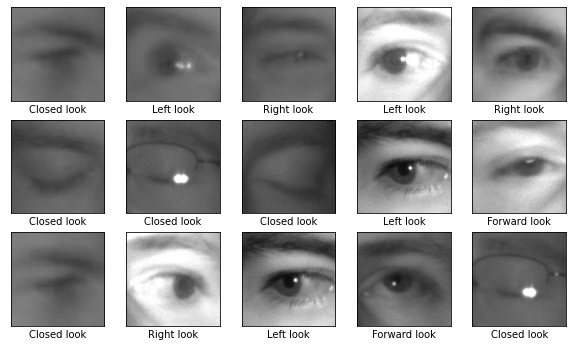

In [ ]:
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in train_dataset:
  for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(label_names[np.argmax(etiqueta[i])])
  break

## Split the dataset in train and test

In [ ]:
# import os
# import numpy as np
# import shutil
# import random
# root_dir = "/content/drive/MyDrive/TFM/dataset/dataset_completo/" # for requesting directly pics
# classes_dir = os.listdir(root_dir)

# train_ratio = 0.9

# input_destination = "/content/drive/MyDrive/TFM/dataset/"

# for cls in classes_dir:
#     os.makedirs(input_destination +'train_dataset/' + cls, exist_ok=True)
#     os.makedirs(input_destination +'test_dataset/' + cls, exist_ok=True)
    
#     # for each class, let's counts its elements
#     src = root_dir + cls
#     allFileNames = os.listdir(src)

#     # shuffle it and split into train/test
#     np.random.shuffle(allFileNames)
#     train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(train_ratio * len(allFileNames))])
    
#     # save their initial path
#     train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
#     test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
#     print("\n *****************************",
#           "\n Total images: ",cls, len(allFileNames),
#           '\n Training: ', len(train_FileNames),
#           '\n Testing: ', len(test_FileNames),
#           '\n *****************************')
    
#     # copy files from the initial path to the final folders
#     for name in train_FileNames:
#       shutil.copy(name, input_destination +'train_dataset/' + cls)
#     for name in test_FileNames:
#       shutil.copy(name, input_destination +'test_dataset/' + cls)


# # checking everything was fine
# paths = ['train_dataset/', 'test_dataset/']
# for p in paths:
#   for dir,subdir,files in os.walk(input_destination + p):
#     print(dir,' ', p, str(len(files)))

## Procesamiento y entrenamiento

In [ ]:
res_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top= False,
    weights='imagenet',
    input_shape=(224, 224, 3) ,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
res_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
len(res_model.layers)

190

In [ ]:
for layer in res_model.layers[:143]:
  layer.trainable = False
# Check the freezed was done ok
for i, layer in enumerate(res_model.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 pool1_pad - False
4 pool1_pool - False
5 conv2_block1_preact_bn - False
6 conv2_block1_preact_relu - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_pad - False
11 conv2_block1_2_conv - False
12 conv2_block1_2_bn - False
13 conv2_block1_2_relu - False
14 conv2_block1_0_conv - False
15 conv2_block1_3_conv - False
16 conv2_block1_out - False
17 conv2_block2_preact_bn - False
18 conv2_block2_preact_relu - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_pad - False
23 conv2_block2_2_conv - False
24 conv2_block2_2_bn - False
25 conv2_block2_2_relu - False
26 conv2_block2_3_conv - False
27 conv2_block2_out - False
28 conv2_block3_preact_bn - False
29 conv2_block3_preact_relu - False
30 conv2_block3_1_conv - False
31 conv2_block3_1_bn - False
32 conv2_block3_1_relu - False
33 conv2_block3_2_pad - False
3

In [ ]:
from keras import Sequential

In [ ]:
model_resnet = Sequential()

In [ ]:
model_resnet.add(res_model)

In [ ]:
model_resnet.add(keras.layers.MaxPooling2D(pool_size = (3,3)))

In [ ]:
model_resnet.add(keras.layers.Flatten())
model_resnet.add(keras.layers.Dropout(0.3))
model_resnet.add(keras.layers.Dense(4, activation = "softmax"))

In [ ]:
model_resnet.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 2048)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 4)                 32772     
                                                                 
Total params: 23,597,572
Trainable params: 16,119,812
Non-trainable params: 7,477,760
____________________________________

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

data_folder_train = "/content/drive/MyDrive/TFM/dataset/train_dataset/"
data_folder_val = "/content/drive/MyDrive/TFM/dataset/val_dataset/"

print("Getting Data...")
datagen_train = ImageDataGenerator(rescale=1./255, # normalize pixel values
                              rotation_range=20,
                              zoom_range=0.1,
                              width_shift_range=0.15,
                              height_shift_range=0.15,
                              horizontal_flip=False,
                              vertical_flip=False)

print("Preparing training dataset...")
train_generator = datagen_train.flow_from_directory(
    data_folder_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

datagen_val = ImageDataGenerator(rescale=1./255, # normalize pixel values
                               )

print("Preparing validation dataset...")
validation_generator = datagen_val.flow_from_directory(
    data_folder_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 13821 images belonging to 4 classes.
Preparing validation dataset...
Found 1439 images belonging to 4 classes.
Data generators ready


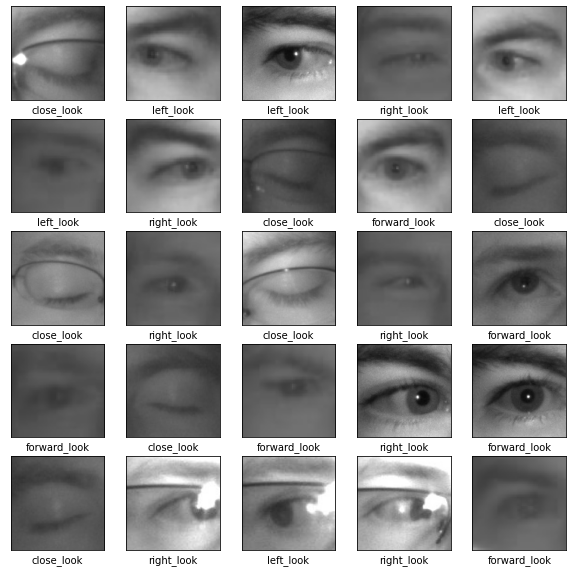

In [ ]:
import os
classes = os.listdir(data_folder_train)
classes.sort()
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in validation_generator:
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(classes[np.argmax(etiqueta[i])]) 
  break

In [ ]:
model_resnet.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [ ]:
# Train the model over 25 epochs using 32-image batches and using the validation holdout dataset for validation
num_epochs = 25
history = model_resnet.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size, 
    epochs = num_epochs)

Epoch 1/25
431/431 [==============================] - 4486s 10s/step - loss: 0.3305 - accuracy: 0.9178 - val_loss: 16.6939 - val_accuracy: 0.8821
Epoch 2/25
431/431 [==============================] - 179s 415ms/step - loss: 0.1137 - accuracy: 0.9641 - val_loss: 0.0866 - val_accuracy: 0.9830
Epoch 3/25
431/431 [==============================] - 180s 417ms/step - loss: 0.0869 - accuracy: 0.9738 - val_loss: 0.0568 - val_accuracy: 0.9808
Epoch 4/25
431/431 [==============================] - 180s 417ms/step - loss: 0.0777 - accuracy: 0.9749 - val_loss: 0.0478 - val_accuracy: 0.9858
Epoch 5/25
431/431 [==============================] - 179s 416ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0398 - val_accuracy: 0.9858
Epoch 6/25
431/431 [==============================] - 180s 416ms/step - loss: 0.0622 - accuracy: 0.9801 - val_loss: 0.0390 - val_accuracy: 0.9886
Epoch 7/25
431/431 [==============================] - 182s 423ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0540 -

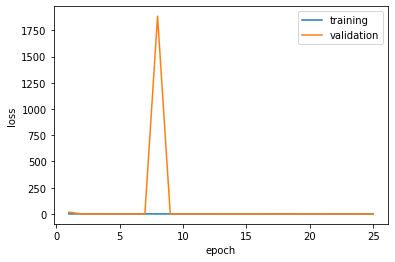

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

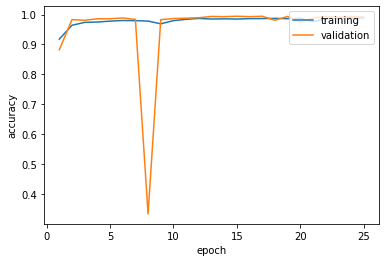

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 1s 732ms/step


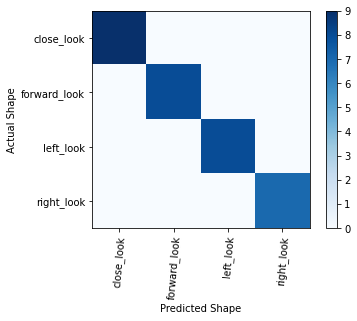

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model_resnet.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [ ]:
export_dir = 'drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout'
tf.keras.models.save_model(model_resnet, filepath=export_dir)
model_resnet.save("drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout.h5")

In [ ]:
import pandas as pd
import csv
hist_df = pd.DataFrame(history.history)

hist_csv_file = '/content/drive/MyDrive/TFM/history_resnet.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

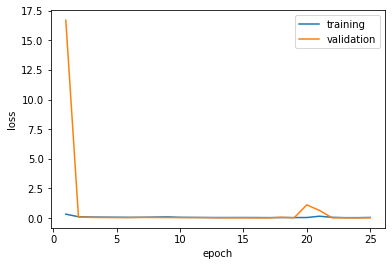

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = hist_df["Epoc"]+1
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

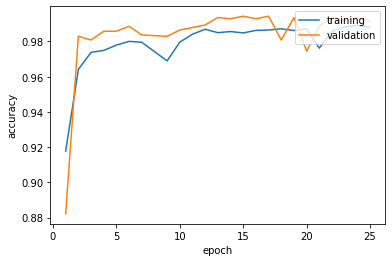

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = hist_df["Epoc"]+1
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
num_epochs = 25
hist_csv_file = '/content/drive/MyDrive/TFM/history_resnet.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.9915
min_val_loss =  0.0251
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file)
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_resnet.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout'
    tf.keras.models.save_model(model_resnet, filepath=export_dir)
    model_resnet.save("drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  26 : 	
432/432 [==============================] - 185s 427ms/step - loss: 0.0384 - accuracy: 0.9884 - val_loss: 0.0125 - val_accuracy: 0.9958


Nuevo máximo accuracy:  0.9958304166793823 
 Nuevo mínimo loss:  0.012491671368479729
Epoca  27 : 	
432/432 [==============================] - 181s 420ms/step - loss: 0.0244 - accuracy: 0.9909 - val_loss: 0.0155 - val_accuracy: 0.9937
Epoca  28 : 	
432/432 [==============================] - 180s 416ms/step - loss: 0.0284 - accuracy: 0.9899 - val_loss: 0.0121 - val_accuracy: 0.9944
Epoca  29 : 	
432/432 [==============================] - 179s 414ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.0192 - val_accuracy: 0.9924
Epoca  30 : 	
432/432 [==============================] - 179s 413ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0186 - val_accuracy: 0.9937
Epoca  31 : 	
432/432 [==============================] - 178s 413ms/step - loss: 0.0244 - accuracy: 0.9925 - val_loss: 0.0108 - val_accuracy: 0.9965


Nuevo máximo accuracy:  0.9965253472328186 
 Nuevo mínimo loss:  0.010814686305820942
Epoca  32 : 	
432/432 [==============================] - 180s 416ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0218 - val_accuracy: 0.9937
Epoca  33 : 	
432/432 [==============================] - 180s 416ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0161 - val_accuracy: 0.9931
Epoca  34 : 	
432/432 [==============================] - 180s 417ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0138 - val_accuracy: 0.9944
Epoca  35 : 	
432/432 [==============================] - 180s 416ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0117 - val_accuracy: 0.9951
Epoca  36 : 	
432/432 [==============================] - 178s 412ms/step - loss: 0.0246 - accuracy: 0.9911 - val_loss: 0.0089 - val_accuracy: 0.9965


Nuevo máximo accuracy:  0.9965253472328186 
 Nuevo mínimo loss:  0.008882608264684677
Epoca  37 : 	
432/432 [==============================] - 179s 414ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0146 - val_accuracy: 0.9944
Epoca  38 : 	
432/432 [==============================] - 180s 417ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0105 - val_accuracy: 0.9958
Epoca  39 : 	
432/432 [==============================] - 180s 416ms/step - loss: 0.0281 - accuracy: 0.9897 - val_loss: 0.0182 - val_accuracy: 0.9937
Epoca  40 : 	
432/432 [==============================] - 179s 415ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0178 - val_accuracy: 0.9924
Epoca  41 : 	
432/432 [==============================] - 178s 411ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0092 - val_accuracy: 0.9965
Epoca  42 : 	
432/432 [==============================] - 179s 415ms/step - loss: 0.0181 - accuracy: 0.9931 - val_loss: 0.0094 - val_accuracy: 0.9958
Epoca  43 : 	
432/43

Nuevo máximo accuracy:  0.9972202777862549 
 Nuevo mínimo loss:  0.010098271071910858
Epoca  47 : 	
432/432 [==============================] - 181s 418ms/step - loss: 0.0206 - accuracy: 0.9943 - val_loss: 0.0066 - val_accuracy: 0.9972


Nuevo máximo accuracy:  0.9972202777862549 
 Nuevo mínimo loss:  0.006585787050426006
Epoca  48 : 	
432/432 [==============================] - 180s 417ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0060 - val_accuracy: 0.9972


Nuevo máximo accuracy:  0.9972202777862549 
 Nuevo mínimo loss:  0.006006933283060789
Epoca  49 : 	
432/432 [==============================] - 179s 413ms/step - loss: 0.1894 - accuracy: 0.9881 - val_loss: 0.0137 - val_accuracy: 0.9965
Epoca  50 : 	
432/432 [==============================] - 180s 416ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0066 - val_accuracy: 0.9972


In [ ]:
hist_df.drop(index=7, inplace=True)

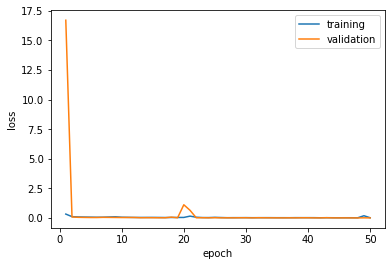

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = hist_df["Epoc"]+1
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

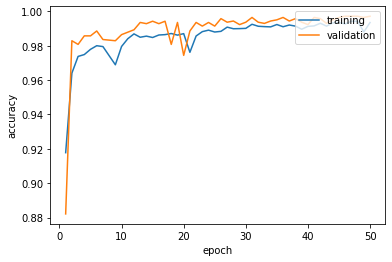

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = hist_df["Epoc"]+1
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
num_epochs = 10
hist_csv_file = '/content/drive/MyDrive/TFM/history_resnet.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.9915
min_val_loss =  0.0251
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file)
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_resnet.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout'
    tf.keras.models.save_model(model_resnet, filepath=export_dir)
    model_resnet.save("drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  51 : 	
432/432 [==============================] - 181s 419ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.0053 - val_accuracy: 0.9979


Nuevo máximo accuracy:  0.9979152083396912 
 Nuevo mínimo loss:  0.005277879536151886
Epoca  52 : 	
432/432 [==============================] - 181s 418ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.0065 - val_accuracy: 0.9965
Epoca  53 : 	
432/432 [==============================] - 177s 410ms/step - loss: 0.0137 - accuracy: 0.9949 - val_loss: 0.0105 - val_accuracy: 0.9944
Epoca  54 : 	
432/432 [==============================] - 181s 418ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0073 - val_accuracy: 0.9965
Epoca  55 : 	
432/432 [==============================] - 178s 411ms/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.0050 - val_accuracy: 0.9986


Nuevo máximo accuracy:  0.9986101388931274 
 Nuevo mínimo loss:  0.005018764641135931
Epoca  56 : 	
432/432 [==============================] - 182s 421ms/step - loss: 0.0109 - accuracy: 0.9958 - val_loss: 0.0067 - val_accuracy: 0.9979
Epoca  57 : 	
432/432 [==============================] - 178s 412ms/step - loss: 0.0326 - accuracy: 0.9943 - val_loss: 0.0687 - val_accuracy: 0.9833
Epoca  58 : 	
432/432 [==============================] - 177s 410ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0057 - val_accuracy: 0.9972
Epoca  59 : 	
432/432 [==============================] - 178s 411ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0068 - val_accuracy: 0.9986
Epoca  60 : 	
432/432 [==============================] - 178s 411ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0048 - val_accuracy: 0.9979


In [12]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_resnet.csv'
hist_df = pd.read_csv(hist_csv_file)

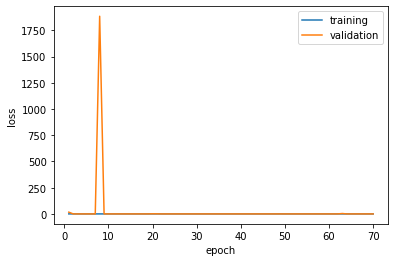

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = hist_df["Epoc"]+1
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

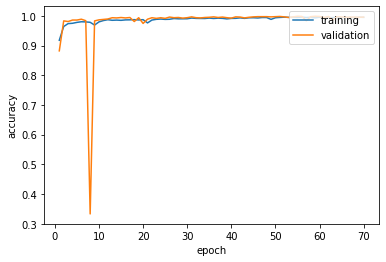

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = hist_df["Epoc"]+1
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [13]:
hist_df.drop(index=7, inplace=True)
epoch_nums = hist_df["Epoc"][:65]+1
training_loss = hist_df["loss"][:65]
validation_loss = hist_df["val_loss"][:65]
training_accuracy = hist_df["accuracy"][:65]
validation_accuracy = hist_df["val_accuracy"][:65]

In [14]:
validation_loss[0] = 4 #17.5 en realidad, para escalar la imagen y que se pueda ver la tendencia, retocar con Paint para poner el valor real 

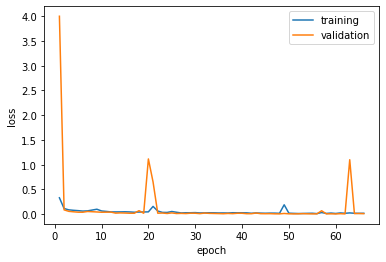

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

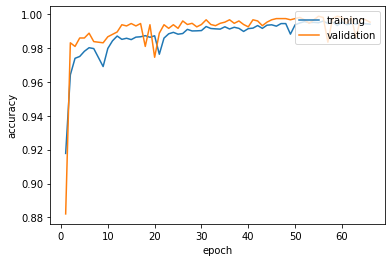

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Inferencia

In [18]:
# Código para cargar una red entrenada desde nuestro equipo al sevidor de Google Colab
from google.colab import files
model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout')
model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset/test_dataset',
                                            batch_size=1440,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 1440 images belonging to 4 classes.


In [ ]:
import os
data_folder = '/content/drive/MyDrive/TFM/dataset/test_dataset'
classes = os.listdir(data_folder)
classes.sort()

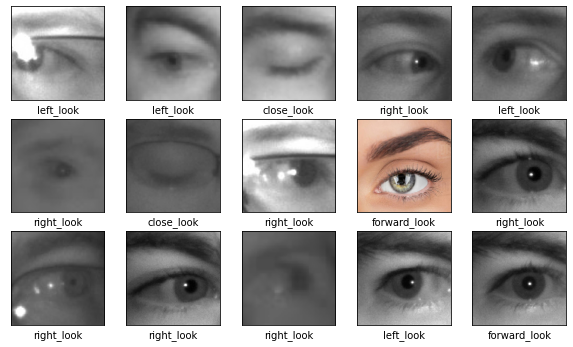

In [ ]:
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in test_generator:
  for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(classes[np.argmax(etiqueta[i])])
  break

Generating predictions from validation data...
45/45 [==============================] - 5s 82ms/step


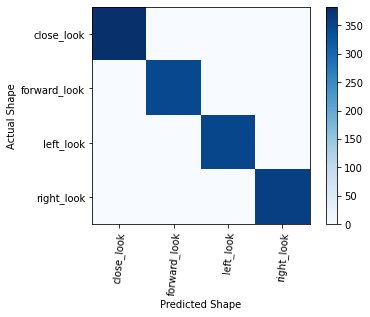

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_generator[0][0]
y_test = test_generator[0][1]

# Use the model to predict the class
start = time.time()
class_probabilities = model.predict(x_test)
end = time.time()

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [ ]:
print("Average time of prediction: %6.4f" % (1000*(end-start) / (len(predictions))), "ms")

Average time of prediction: 3.8262 ms


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels,predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.9986111111111111


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions, target_names=classes))

              precision    recall  f1-score   support

  close_look       1.00      1.00      1.00       375
forward_look       0.99      1.00      1.00       358
   left_look       1.00      1.00      1.00       343
  right_look       1.00      0.99      1.00       364

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[383   0   0   0]
 [  0 346   0   0]
 [  0   0 349   1]
 [  0   1   0 360]]


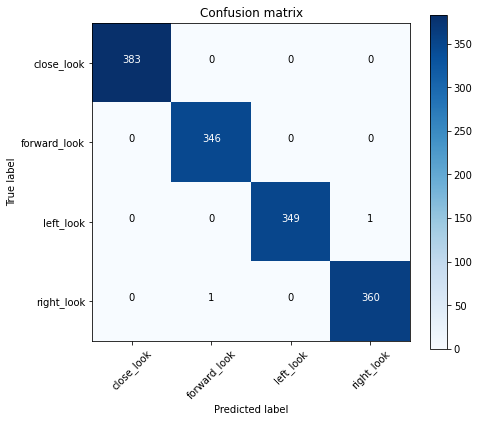

In [ ]:
cnf_matrix = confusion_matrix(true_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
res = []
for l in range(len(classes)):
    
    prec,recall, f_score, support = precision_recall_fscore_support(np.array(true_labels)==l,
                                                      np.array(predictions)==l,
                                                      pos_label=True,average=None)
    res.append([classes[l],recall[0],recall[1], prec[1], support[1]])

In [ ]:
pd.DataFrame(res,columns = ['class','specificity','sensitivity', 'precision', 'support'])

,class,specificity,sensitivity,precision,support
0,close_look,1.000000,1.000000,1.000000,383
1,forward_look,0.999086,1.000000,0.997118,346
2,left_look,1.000000,0.997143,1.000000,350
3,right_look,0.999073,0.997230,0.997230,361


In [ ]:
# make a prediction for a new image.
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    plt.imshow(img)
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32') / 255

    return img
 
# load an image and predict the class
def run_example(image_name):
    # load the image
    img = load_image("/content/drive/MyDrive/TFM/inferencia/" + image_name)
    # load model
    #model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_resnet')
    # predict the class
    result = model.predict(img)
    print(result[0])
    etiqueta_prediccion = np.argmax(result)
    plt.xlabel(classes[etiqueta_prediccion])
    print(etiqueta_prediccion)
    print(classes[etiqueta_prediccion])

1/1 [==============================] - 0s 23ms/step
[4.2725812e-28 4.3117545e-09 2.2310912e-14 1.0000000e+00]
3
right_look
1/1 [==============================] - 0s 23ms/step
[2.6283204e-04 2.1390665e-02 9.3312824e-01 4.5218311e-02]
2
left_look
1/1 [==============================] - 0s 22ms/step
[0.46654305 0.25616714 0.1088773  0.16841249]
0
close_look
1/1 [==============================] - 0s 22ms/step
[8.9202855e-05 8.5939825e-01 1.3906497e-01 1.4475414e-03]
1
forward_look


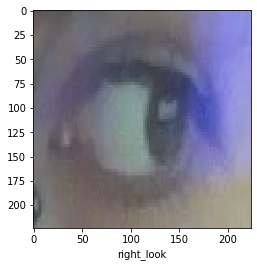

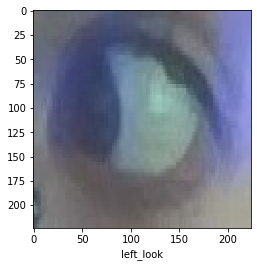

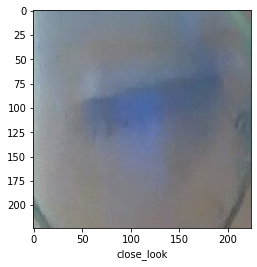

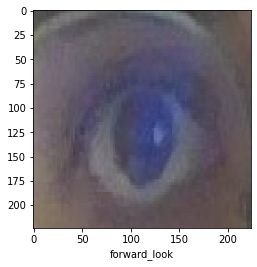

In [ ]:
#model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_resnet')
# entry point, run the example
image_names = ["yo_right.jpg", "yo_left.jpg", "yo_close1.jpg", "yo_forward.jpg"]
for image in image_names:
  plt.figure()
  run_example(image)

## Segunda Validación: datos webcam

4 classes:
['close_look', 'forward_look', 'left_look', 'right_look']


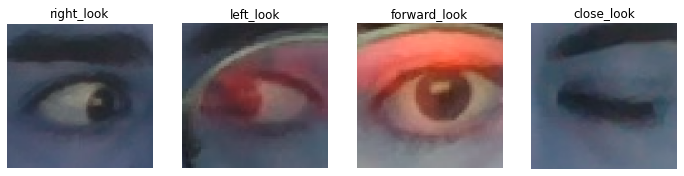

In [ ]:
from tensorflow.keras import models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = '/content/drive/MyDrive/TFM/cv2_dataset'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 24))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(sub_dir)
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset_webcam',
                                            batch_size=48,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 48 images belonging to 4 classes.


Generating predictions from test data...
2/2 [==============================] - 1s 107ms/step
Confusion matrix, without normalization
[[ 6  6  0  0]
 [ 0  7  3  2]
 [ 2  1  9  0]
 [ 0  0  0 12]]
Accuracy:  0.7083333333333334
Average time of prediction: 18.9998 ms


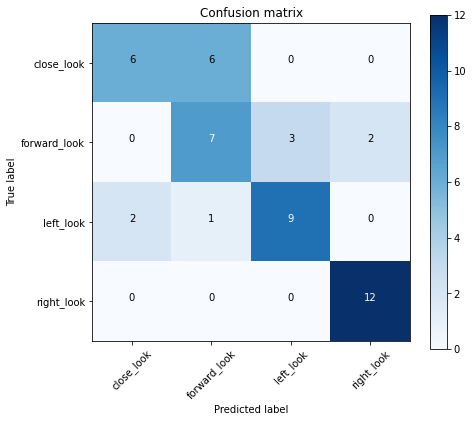

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_resnet_v2_dropout')
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

print("Generating predictions from test data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_generator[0][0]
y_test = test_generator[0][1]

# Use the model to predict the class
start = time.time()
class_probabilities = model.predict(x_test)
end = time.time()

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

cnf_matrix = confusion_matrix(true_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels,predictions)
print("Accuracy: ", accuracy)

print("Average time of prediction: %6.4f" % (1000*(end-start) / (len(predictions))), "ms")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
res = []
for l in range(len(classes)):
    
    prec,recall, f_score, support = precision_recall_fscore_support(np.array(true_labels)==l,
                                                      np.array(predictions)==l,
                                                      pos_label=True,average=None)
    res.append([classes[l],recall[0],recall[1], prec[1], support[1]])

In [ ]:
pd.DataFrame(res,columns = ['class','specificity','sensitivity', 'precision', 'support'])

,class,specificity,sensitivity,precision,support
0,close_look,0.944444,0.500000,0.750000,12
1,forward_look,0.805556,0.583333,0.500000,12
2,left_look,0.916667,0.750000,0.750000,12
3,right_look,0.944444,1.000000,0.857143,12
